------------------------------------------
| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  |  MAP, Credible Intervals, Posterior Transforms|
| Notes | Ad Example: Probability of Success of Ad Campaign| 
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 05/29/20 |
-------------------------------------------------

In this notebook we will generate the distribution for profits $(\tau)$ as follows:
$$
\tau|\theta,n,X = X\times $5 \times \theta^2 - \$0.2\times n 
$$

In [1]:
# Import librarires
import numpy as np
import pandas as pd
import plotnine as pn
import scipy as sp

# Plot configurations
pn.options.figure_size = (6,4)
pn.options.dpi = 125

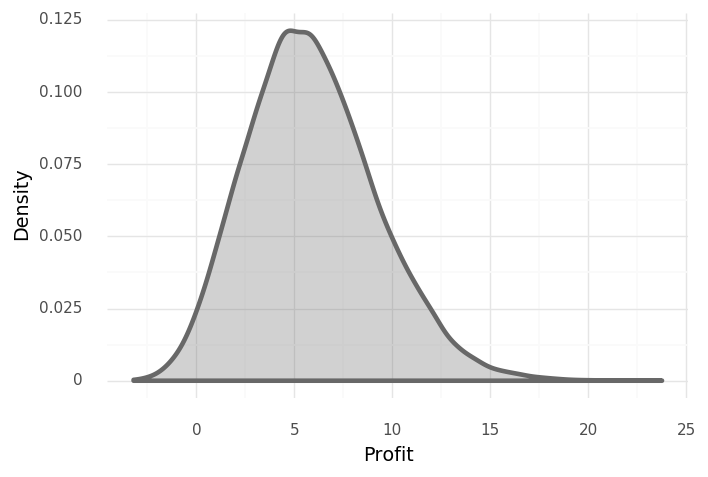

<ggplot: (-9223372036515827140)>

In [4]:
### Posterior ###
n_sims = 30000

# Observed values
X = 15
n = 35

# Prior values
alpha = 20
beta = 30

# Posterior values
alpha_prime = alpha + X
beta_prime = beta + n - X
theta_given_X = np.random.beta(alpha_prime,beta_prime, size = n_sims)
theta_given_X.sort()

### Profit distribution ###
profit = 5 * X * theta_given_X**2 -  0.2 * n
profit = pd.DataFrame({'profit':profit})

### Plot ###
pn.ggplot(pn.aes('profit'), data = profit)\
+ pn.geom_density(fill = '#686868', color = '#686868', size = 1.5, alpha = 0.3)\
+ pn.theme_minimal()\
+ pn.ylab('Density')\
+ pn.xlab('Profit')

In [5]:
# Approximate MAP estimate
MAP_estimate = sp.stats.mode(np.round(profit,1))[0].flatten().tolist()[0]
print('The MAP estimate is {}'.format(MAP_estimate))

The MAP estimate is 4.3


In [6]:
# Approximate 90% Credible Interval
ci_value = 0.9
delta = 0.1
profit_lower = MAP_estimate - delta
profit_upper = MAP_estimate + delta

# Probability of Credible interval centered at the MAP
ci = lambda profit_lower, profit_upper: np.mean((profit <= profit_upper) & (profit_lower <= profit))
current_ci_value = ci(profit_lower, profit_upper)

while (current_ci_value < ci_value).bool():
    profit_lower -= delta
    profit_upper += delta
    current_ci_value = ci(profit_lower, profit_upper)

print('The approximate 90\% credible interval is ({l},{u})'.format(l = np.round(profit_lower,2), u = np.round(profit_upper,2)))

The approximate 90\% credible interval is (-1.8,10.4)
